In [153]:
import pandas as pd
import matplotlib.pyplot as plt

**注：除非特别说明，完成以下任务时不要使用numpy或任何其他的库，只使用pandas和matplotlib自带的功能**

In [154]:
# 读取 data/score.xlsx 成绩单

data = pd.read_excel('data/score.xlsx')

In [155]:
# 查看前5行数据

print(data.head())

   学号 科目  成绩
0   4  A  36
1  36  A   0
2  18  A   6
3  59  A   0
4  47  A  65


In [156]:
# 计算每门课的人数

course_count = data['科目'].value_counts()
print(course_count)

科目
D    75
C    73
A    70
E    69
B    65
Name: count, dtype: int64


In [157]:
# 计算每门课的平均分

course_mean = data.groupby('科目')['成绩'].mean()
print(course_mean)

科目
A    32.742857
B    43.107692
C    43.863014
D    40.360000
E    59.072464
Name: 成绩, dtype: float64


In [158]:
# 计算每门课的分数标准差（自己思考应该使用哪一种计算方式并给出理由）

course_std = data.groupby('科目')['成绩'].std()
print(course_std)

# 应该使用std()方法计算标准差

科目
A    34.067999
B    21.568295
C    32.103701
D    27.560077
E    34.352977
Name: 成绩, dtype: float64


In [159]:
# 计算每门课的及格率（分数≥60的人数除以该门课总人数）

course_pass_rate = data[data['成绩'] >= 60].groupby('科目')['成绩'].count() / course_count
print(course_pass_rate)

科目
A    0.271429
B    0.200000
C    0.301370
D    0.240000
E    0.492754
dtype: float64


In [160]:
# 计算每个学生的平均分，从高到低排序，显示前10名

student_mean = data.groupby('学号')['成绩'].mean().sort_values(ascending=False)
print(student_mean.head(10))

学号
38    78.00
17    76.75
74    69.25
79    68.80
46    68.20
16    67.80
47    65.40
69    64.75
72    62.00
70    61.50
Name: 成绩, dtype: float64


In [161]:
# 将科目A的成绩视为离散随机变量，计算它的熵（可以用numpy的log函数）

import numpy as np

course_A = data[data['科目'] == 'A']['成绩']
course_A_count = course_A.value_counts()
course_A_p = course_A_count / course_A_count.sum()
course_A_entropy = -np.sum(course_A_p * np.log2(course_A_p))
print(course_A_entropy)

4.390466787167005


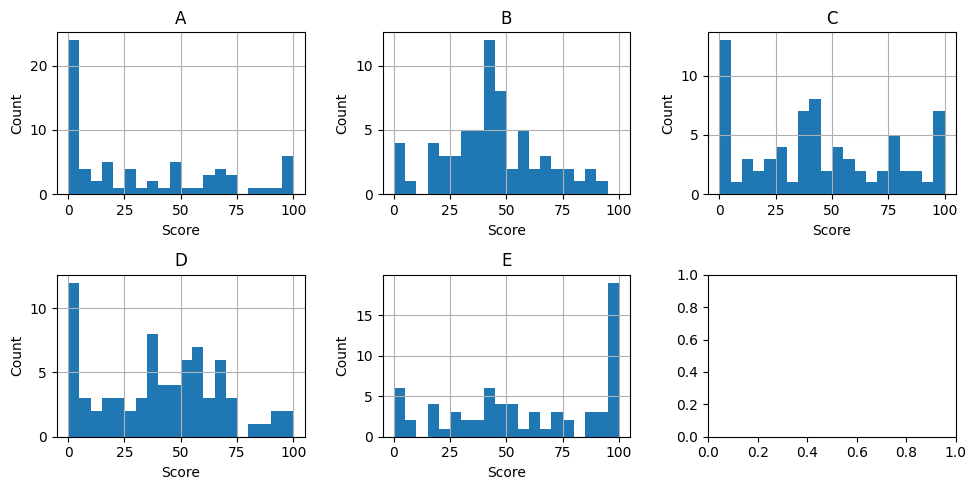

In [162]:
# 绘制每门课的成绩直方图，要求如下
# - 使用子图，布局为2行3列
# - 每个子图的标题为课程名称，x轴标题为"Score"，y轴标题为"Count"
# - 直方图x轴范围是0~100，分成20个柱子；y轴范围是0~30
# - 显示网格
# - 整体尺寸为 高5 宽10

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, (course, group) in enumerate(data.groupby('科目')):
    ax = axes[i // 3, i % 3]
    group['成绩'].plot(kind='hist', bins=20, range=(0, 100), ax=ax, title=course, grid=True)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

41
科目            A           B         C           D           E
科目                                                           
A   1235.575610   45.140244   -13.400  -15.884146   97.470122
B     45.140244  412.756098    20.475    9.246341  -56.096951
C    -13.400000   20.475000  1093.400  -17.275000   89.950000
D    -15.884146    9.246341   -17.275  701.962195  -62.301829
E     97.470122  -56.096951    89.950  -62.301829  989.989024


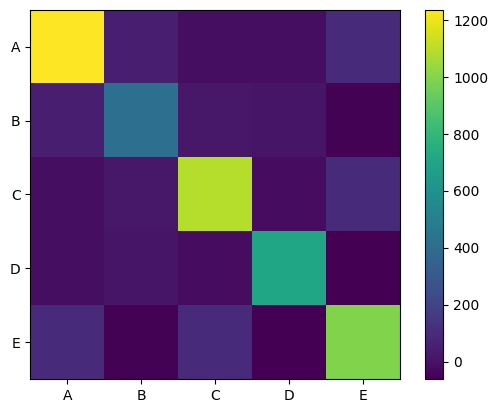

In [163]:
# 筛选出参加了全部科目考试的学生
# 1. 输出学生数目
# 2. 以他们的成绩计算这5门科目的协方差矩阵，print出来
# 3. 使用imshow绘图展示协方差矩阵，在x轴和y轴标记科目名称，显示colorbar

student_all_courses = data.groupby('学号').filter(lambda x: x['科目'].nunique() == 5)
print(student_all_courses['学号'].nunique())
student_all_courses_cov = student_all_courses.pivot(index='学号', columns='科目', values='成绩').cov()
print(student_all_courses_cov)
plt.imshow(student_all_courses_cov, cmap='viridis')
plt.colorbar()
plt.xticks(range(5), student_all_courses_cov.columns)
plt.yticks(range(5), student_all_courses_cov.columns)
plt.show()